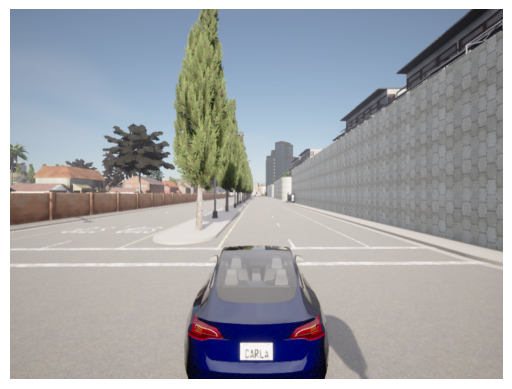

received image: frame5077, size = 800x600
stopped after 10 frames


In [1]:
# import libraries
import carla
import random
import time
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

frame_count =0 

client = carla.Client('localhost', 2000)
client.set_timeout(10.0)

world = client.get_world()
blueprint_library= world.get_blueprint_library()

client.load_world('/Game/Carla/Maps/Town03_Opt')
print('Map sucessfully changed to town 03_Opt')

vehicle_bp = blueprint_library.find('vehicle.tesla.model3')

spawn_points = world.get_map().get_spawn_points()

spawn_point = spawn_points[0]

vehicle = world.spawn_actor(vehicle_bp, spawn_point)

camera_bp = blueprint_library.find('sensor.camera.rgb')

camera_bp.set_attribute('image_size_x', '800')
camera_bp.set_attribute('image_size_y', '600')
camera_bp.set_attribute('fov', '90')

camera_transform = carla.Transform(carla.Location(x=-5, y=0, z=2.5))

camera = world.spawn_actor(camera_bp, camera_transform, attach_to= vehicle)

def process_image(image):
    global frame_count

    image_data = np.frombuffer(image.raw_data, dtype=np.uint8)
    image_data= image_data.reshape((image.height, image.width,4))
    image_rgb = image_data[:, :, :3][:, :, ::-1]

    plt.figure(figsize=(8,6))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

    
    print(f'received image: frame{image.frame}, size = {image.width}x{image.height}')
    frame_count +=1

    if frame_count >=10:
        camera.stop()
        camera.destroy()
        print('stopped after 10 frames')

camera.listen(process_image)
    
    
                           
